## Homework 4
#### Sam (Dong Wook) Ko

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("HeavenlyChocolates.csv")
data.head()

,Customer,Day,Browser,Time,Pages_Viewed,Amount_Spent
0,1,Mon,Chrome,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Chrome,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Chrome,11.3,4,66.27


#### 1. Using the techniques we have learned in class so far (i.e. DON’T use groupby() method), create a dataframe that shows the number of visits to Heavenly Chocoloate’s website using different browsers. Your output should be similar to the following table.

Browser: Count
Chrome: 27
Other: 16
Firefox: 7

In [3]:
chrome = data.loc[data.Browser == "Chrome","Pages_Viewed"].count()
other = data.loc[data.Browser == "Other","Pages_Viewed"].count()
firefox = data.loc[data.Browser == "Firefox", "Pages_Viewed"].count()
browser = [["Chrome",chrome],["Other",other],["Firefox",firefox]]
browser_df = pd.DataFrame(browser, columns = ["Browser","Count"])
browser_df

,Browser,Count
0,Chrome,27
1,Other,7
2,Firefox,16


#### 2. Create a duplicate of the following graph to show which browser is used more by the Heavenly Chocolate website visitors? The dashed line represents the mean of count visits for all browsers in the dataset.

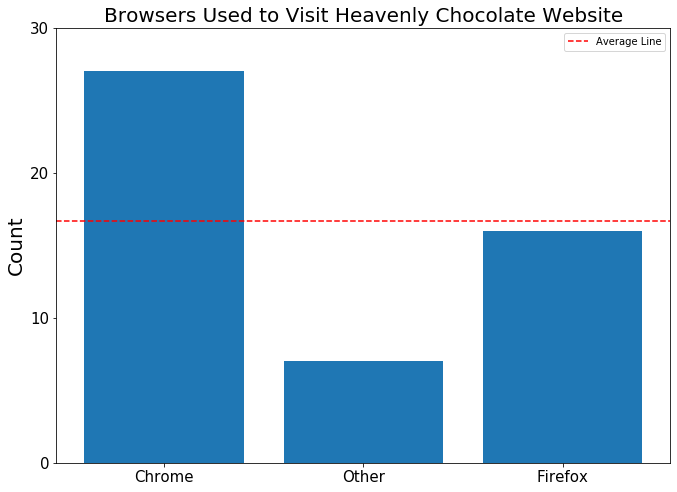

In [4]:
plt.figure(figsize = (11,8))
plt.bar(browser_df.Browser, browser_df.Count)
plt.title("Browsers Used to Visit Heavenly Chocolate Website", fontsize = 20, color = "black")
plt.ylabel("Count",fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,31,10), fontsize = 15)
plt.axhline(y= browser_df["Count"].mean(), 
            color = "red", 
            linestyle = "--", 
            linewidth = 1.5, 
            label = "Average Line")
plt.legend(loc="upper right")
plt.show()

#### 3. Create an duplicate of the following scatterplot that shows the relationship between the time spent browsing, and the amount spent buying using either Firefox or Chrome browswers. What does this plot tell you about the company’s revenues using both channels?

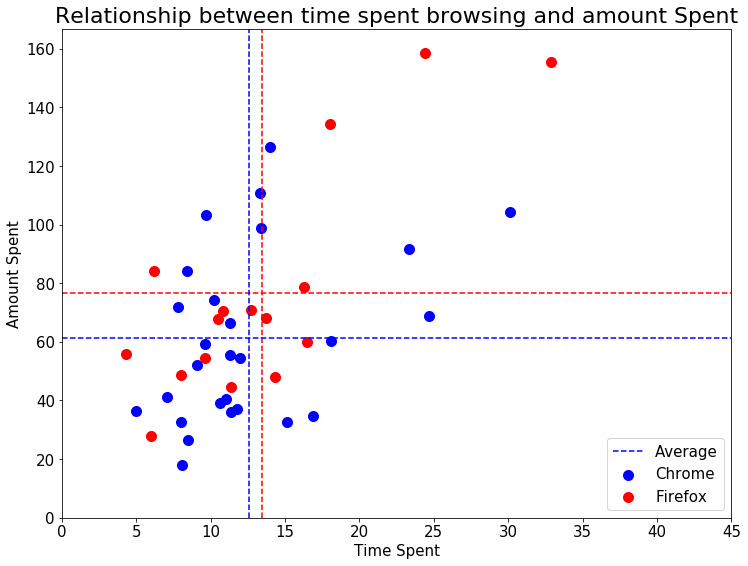

In [5]:
firefox_dot = data[data.Browser=="Firefox"]
chrome_dot = data[data.Browser=="Chrome"]

plt.figure(figsize = (12,9))
plt.scatter(chrome_dot.Time, chrome_dot.Amount_Spent,
            color = "blue", 
            label = "Chrome",
            s = 100)
plt.scatter(firefox_dot.Time, firefox_dot.Amount_Spent,
            color = "red", 
            label = "Firefox", 
            s = 100)

plt.title("Relationship between time spent browsing and amount Spent", fontsize = 22)

plt.ylabel("Amount Spent", fontsize = 15)
plt.xlabel("Time Spent", fontsize = 15)
plt.xticks(np.arange(0,46,5), fontsize = 15)
plt.yticks(np.arange(0,170,20), fontsize = 15)
plt.axhline(y= firefox_dot["Amount_Spent"].mean(), 
            color = "red", 
            linestyle = "--", 
            linewidth = 1.5)
plt.axvline(x= firefox_dot["Time"].mean(), 
            color = "red", 
            linestyle = "--", 
            linewidth = 1.5)

plt.axhline(y= chrome_dot["Amount_Spent"].mean(), 
            color = "blue", 
            linestyle = "--", 
            linewidth = 1.5)
plt.axvline(x= chrome_dot["Time"].mean(), 
            color = "blue", 
            linestyle = "--", 
            linewidth = 1.5,
            label = "Average")
plt.legend(loc=4, fontsize = 15)
plt.show()

The graph shows that people who use Firefox browser have a higher tendency to spend more time and money online than those who use Chrome as their browser. Also, there seems to be a positive correlation between the time spent and amount spent.

#### 4. Create the following chart which shows the number of website visitors per day for people using Chrome or Firefox.

In [6]:
# first, create a df that holds the visitor count by the day for Chrome
chrome_mon = data.loc[(data.Browser == "Chrome") & (data.Day == "Mon"),"Customer"].count()
chrome_tue = data.loc[(data.Browser == "Chrome") & (data.Day == "Tue"),"Customer"].count()
chrome_wed = data.loc[(data.Browser == "Chrome") & (data.Day == "Wed"),"Customer"].count()
chrome_thu = data.loc[(data.Browser == "Chrome") & (data.Day == "Thu"),"Customer"].count()
chrome_fri = data.loc[(data.Browser == "Chrome") & (data.Day == "Fri"),"Customer"].count()
chrome_sat = data.loc[(data.Browser == "Chrome") & (data.Day == "Sat"),"Customer"].count()
chrome_sun = data.loc[(data.Browser == "Chrome") & (data.Day == "Sun"),"Customer"].count()

chrome_visitors = [["Mon",chrome_mon],["Tue",chrome_tue],["Wed",chrome_wed],["Thu",chrome_thu],
                   ["Fri",chrome_fri],["Sat",chrome_sat],["Sun",chrome_sun]]
chrome_visitors = pd.DataFrame(chrome_visitors, columns = ["Day","Visitor_Count"])
chrome_visitors

,Day,Visitor_Count
0,Mon,5
1,Tue,4
2,Wed,4
3,Thu,4
4,Fri,4
5,Sat,3
6,Sun,3


In [41]:
browserday = data.groupby(["Browser","Day"]).count().reset_index()
chromeday = browserday.loc[browserday.Browser == "Chrome",["Day","Customer"]]
chromeday["daynum"] = chromeday["Day"].apply(lambda x: 1 if x=="Mon" else 
                                             (2 if x=="Tue" else 
                                              (3 if x == "Wed" else 
                                               (4 if x == "Thu" else 
                                                (5 if x == "Fri" else 
                                                 (6 if x == "Sat" else 
                                                  7))))))
chromeday = chromeday.sort_values("daynum")
chromeday

,Day,Customer,daynum
1,Mon,5,1
5,Tue,4,2
6,Wed,4,3
4,Thu,4,4
0,Fri,4,5
2,Sat,3,6
3,Sun,3,7


In [42]:
browserday = data.groupby(["Browser","Day"]).count().reset_index()
ffday = browserday.loc[browserday.Browser == "Firefox",["Day","Customer"]]
ffday["daynum"] = ffday["Day"].apply(lambda x: 1 if x=="Mon" else 
                                             (2 if x=="Tue" else 
                                              (3 if x == "Wed" else 
                                               (4 if x == "Thu" else 
                                                (5 if x == "Fri" else 
                                                 (6 if x == "Sat" else 
                                                  7))))))
ffday = ffday.sort_values("daynum")
ffday

,Day,Customer,daynum
8,Mon,2,1
12,Tue,2,2
13,Wed,1,3
11,Thu,1,4
7,Fri,6,5
9,Sat,3,6
10,Sun,1,7


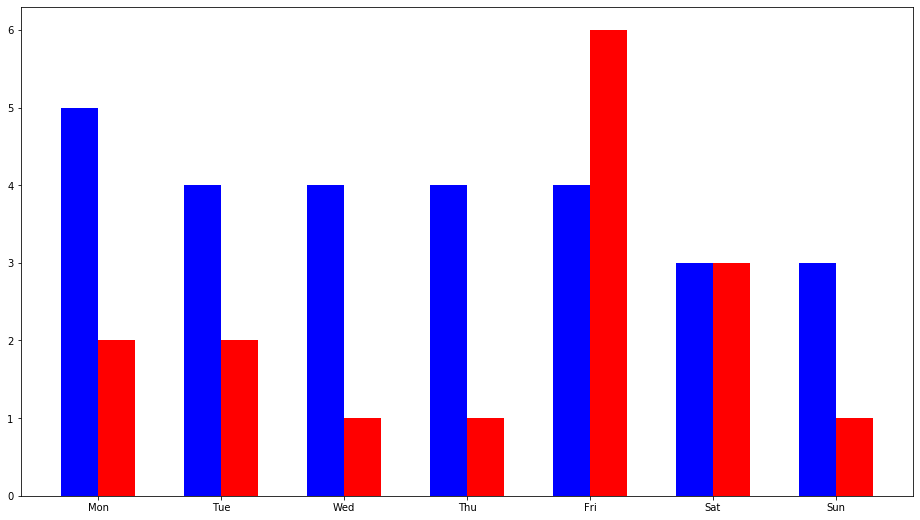

In [57]:
plt.figure(figsize = (16,9))
pos = np.arange(len(chromeday.Day.unique()))
bar_width = 0.3
plt.bar(pos-bar_width/2, chromeday.Customer, color = "blue", width = 0.3)
plt.bar(pos+bar_width/2, ffday.Customer, color = "red", width = 0.3)

plt.xticks(pos)
ax = plt.gca()
ax.set_xticklabels(chromeday.Day)


plt.show()

In [8]:
# same thing for Firefox
firefox_mon = data.loc[(data.Browser == "Firefox") & (data.Day == "Mon"),"Customer"].count()
firefox_tue = data.loc[(data.Browser == "Firefox") & (data.Day == "Tue"),"Customer"].count()
firefox_wed = data.loc[(data.Browser == "Firefox") & (data.Day == "Wed"),"Customer"].count()
firefox_thu = data.loc[(data.Browser == "Firefox") & (data.Day == "Thu"),"Customer"].count()
firefox_fri = data.loc[(data.Browser == "Firefox") & (data.Day == "Fri"),"Customer"].count()
firefox_sat = data.loc[(data.Browser == "Firefox") & (data.Day == "Sat"),"Customer"].count()
firefox_sun = data.loc[(data.Browser == "Firefox") & (data.Day == "Sun"),"Customer"].count()

firefox_visitors = [["Mon",firefox_mon],["Tue",firefox_tue],["Wed",firefox_wed],["Thu",firefox_thu],
                   ["Fri",firefox_fri],["Sat",firefox_sat],["Sun",firefox_sun]]
firefox_visitors = pd.DataFrame(firefox_visitors, columns = ["Day","Visitor_Count"])
firefox_visitors

,Day,Visitor_Count
0,Mon,2
1,Tue,2
2,Wed,1
3,Thu,1
4,Fri,6
5,Sat,3
6,Sun,1


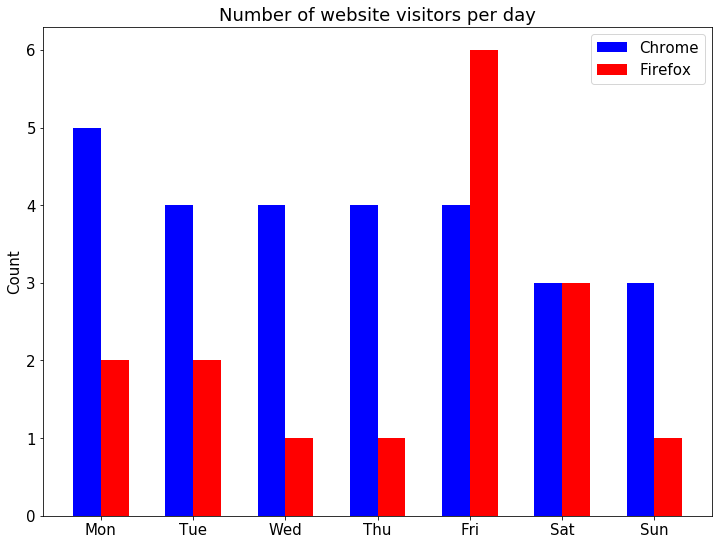

In [9]:
plt.figure(figsize = (12,9))

pos=np.arange(len(chrome_visitors.Day))
barwidth = 0.3

plt.bar (pos - barwidth/2, 
         chrome_visitors.Visitor_Count, 
         color = "blue", 
         width = barwidth, 
         label = "Chrome")

plt.bar (pos + barwidth/2, 
         firefox_visitors.Visitor_Count, 
         color = "red", 
         width = barwidth, 
         label = "Firefox")

plt.title ("Number of website visitors per day", fontsize = 18)
plt.ylabel("Count", fontsize = 15)


ax = plt.gca()
ax.set_xticks(range(len(chrome_visitors)))
ax.set_xticklabels(chrome_visitors.Day, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 1, prop={"size":15})
plt.show()